In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h = 1

In [3]:
fFD =  1./(2.*h*h)
fPD =  1./(8.*h/2*h/2)

In [4]:
M = np.zeros([17,17])

In [5]:
M [0][0] = 1

In [6]:
M [1][0] = -2 * fFD
M [1][1] = 4 * fFD
M [1][2] = -2 * fFD

In [7]:
M [2][1] = -2 * fFD
M [2][2] = 4 * fFD
M [2][3] = -2 * fFD

Match the displacement $u_3$ and $u_6$

In [8]:
M [3][3] = -1
M [3][6] = 1

Match the displacement $u_4$ and $u_2$

In [9]:
M [4][4] = -1
M [4][2] = 1

Interpolate the displacement $u_5$ and $u_5'$

* $u_5'-u_5=0$
* $\frac{1}{2}\left(u_2 + u_3\right)-u_5=0$

In [10]:
M [5][5] = -1
M [5][2] = 1/2
M [5][3] = 1/2

Apply the non-local model

In [11]:
for i in range(6,11):
    M[i][i-2] = -1.  * fPD
    M[i][i-1] = -4. * fPD
    M[i][i] = 10. * fPD
    M[i][i+1] =  -4. * fPD
    M[i][i+2] = -1. * fPD

Interpolate the displacement $u_{12}$ and $u_{12}'$

In [12]:
M [11][11] = -1
M [11][13] = 1/2
M [11][14] = 1/2

Match the displacement $u_{13}$ and $u_{15}$

In [13]:
M [12][12] = -1
M [12][14] = 1

Match the displacement $u_{11}$ and $u_{14}$

In [14]:
M [13][13] = -1
M [13][10] = 1

In [15]:
M [14][13] = -2  * fFD
M [14][14] = 4 * fFD
M [14][15] = -2 * fFD

In [16]:
M [15][14] = -2 * fFD
M [15][15] = 4 * fFD
M [15][16] = -2 * fFD

In [17]:
M [16][16] = 1

In [18]:
M

array([[ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-1. ,  2. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -1. ,  2. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  0.5,  0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.5, -2. ,  5. , -2. , -0.5,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.5, -2. ,  5. , -2. , -0.5,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.5

Contruct the force vector

In [19]:
f = np.zeros([17])

In [20]:
for i in range(1,16):
    f[i] =  8/9

In [21]:
f [3] = 0
f [4] = 0 
f [5] = 0
f [11] = 0
f [12] = 0
f [13] = 0
f

array([0.        , 0.88888889, 0.88888889, 0.        , 0.        ,
       0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.        , 0.        , 0.        , 0.88888889,
       0.88888889, 0.        ])

In [22]:
u = np.linalg.solve(M,f)
u

array([0.        , 2.95398429, 5.01907969, 6.1952862 , 5.01907969,
       5.60718294, 6.1952862 , 6.52300786, 6.6352413 , 6.52300786,
       6.1952862 , 5.60718294, 5.01907969, 6.1952862 , 5.01907969,
       2.95398429, 0.        ])

In [23]:
x1 = np.arange(0,3,1)
x2 = np.arange(3,5,0.5)
x3 = np.arange(5,8.5,1)
x = np.array(np.concatenate((x1,x2,x3)))
x

array([0. , 1. , 2. , 3. , 3.5, 4. , 4.5, 5. , 6. , 7. , 8. ])

In [24]:
uSlice = np.array(np.concatenate((u[0:4],u[7:10],u[13:len(u)])))
uSlice

array([0.        , 2.95398429, 5.01907969, 6.1952862 , 6.52300786,
       6.6352413 , 6.52300786, 6.1952862 , 5.01907969, 2.95398429,
       0.        ])

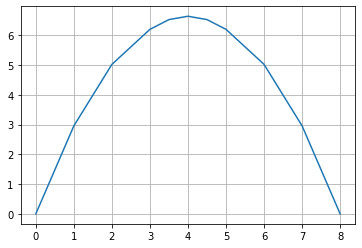

In [25]:
plt.plot(x,uSlice)
plt.grid()

In [26]:
def FDM(n,h):

    M = np.zeros([n,n])

    M[0][0] = 1

    for i in range(1,n-1):
        M[i][i-1] = -2
        M[i][i] = 4
        M[i][i+1] = -2

    M[n-1][n-1] = 1


    M *= 1./(2.*h*h)

    return M

In [27]:
MFDM = FDM(17,0.5)
len(MFDM)

17

In [28]:
fFDM = np.zeros([17])
len(fFDM)

17

In [29]:
for i in range(1,16):
    fFDM[i] =  8/9

In [30]:
fFDM

array([0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.        ])

In [31]:
uFDM = np.linalg.solve(MFDM,fFDM)

In [32]:
uFDM

array([0.        , 1.66666667, 3.11111111, 4.33333333, 5.33333333,
       6.11111111, 6.66666667, 7.        , 7.11111111, 7.        ,
       6.66666667, 6.11111111, 5.33333333, 4.33333333, 3.11111111,
       1.66666667, 0.        ])

In [33]:
xFDM = np.arange(0,8.5,0.5)
xFDM

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. ])

In [34]:
MFDM = FDM(9,1)
len(MFDM)

9

In [35]:
fFDM = np.zeros([9])
len(fFDM)

9

In [36]:
for i in range(1,8):
    fFDM[i] =  8/9

In [37]:
fFDM

array([0.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.        ])

In [38]:
uFDM2 = np.linalg.solve(MFDM,fFDM)

In [39]:
uFDM2

array([0.        , 3.11111111, 5.33333333, 6.66666667, 7.11111111,
       6.66666667, 5.33333333, 3.11111111, 0.        ])

In [40]:
xFDM2 = np.arange(0,8.5,1)
xFDM2

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

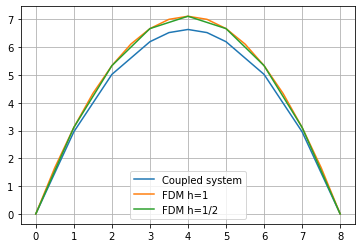

In [45]:
plt.plot(x,uSlice,label="Coupled system")
plt.plot(xFDM,uFDM,label="FDM h=1")
plt.plot(xFDM2,uFDM2,label="FDM h=1/2")
plt.grid()
plt.legend()